![EvalML Logo](images/evalml_logo.png)


# What is EvalML?
EvalML is an AutoML library that builds, optimizes, and evalutes machine learning pipelines using domain-specific objective functions.


Combined with [Featuretools](https://featuretools.featurelabs.com) and [Compose](https://compose.featurelabs.com), EvalML can be used to create end-to-end machine learning solutions for classification and regression problems. 


# Quick Start

In [1]:
import evalml

/Users/christopher.bunn/dev_envs/evalml/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Load Data

First, we load in the features and outcomes we want to use to train our model

In [2]:
X, y = evalml.demos.load_breast_cancer()

## Configure search

EvalML has many options to configure the pipeline search. At the minimum, we need to define an objective function. For simplicity, we will use the F1 score in this example. However, the real power of EvalML is in using domain-specific [objective functions](objectives/overview.html) or [building your own](objectives/custom_objectives.html).

In [3]:
clf = evalml.AutoClassifier(objective="f1",
                            max_pipelines=5)

In order to validate the results of the pipeline creation and optimization process, we will save some of our data as a holdout set

In [4]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, test_size=.2)

When we call `.fit()`, the search for the best pipeline will begin. 

In [5]:
clf.fit(X_train, y_train)

*****************************
* Beginning pipeline search *
*****************************

Optimizing for F1. Greater score is better.

Searching up to 5 pipelines. 
Possible model types: linear_model, xgboost, random_forest

✔ XGBoost Classifier w/ One Hot Encod...     0%|          | Elapsed:00:00
✔ XGBoost Classifier w/ One Hot Encod...    20%|██        | Elapsed:00:00
✔ Random Forest Classifier w/ One Hot...    40%|████      | Elapsed:00:06
✔ XGBoost Classifier w/ One Hot Encod...    60%|██████    | Elapsed:00:06
✔ Logistic Regression Classifier w/ O...    80%|████████  | Elapsed:00:09
✔ Logistic Regression Classifier w/ O...   100%|██████████| Elapsed:00:09

✔ Optimization finished


## See Pipeline Rankings

After the search is finished we can view all of the pipelines searched, ranked by score. Internally, EvalML performs [cross validation](automl/guardrails.html) to score the pipelines. If it notices a high variance across cross validation folds, it will warn you.

In [6]:
clf.rankings

,id,pipeline_name,score,high_variance_cv,parameters
0,2,RFClassificationPipeline,0.973822,False,"{'n_estimators': 569, 'max_depth': 22, 'impute..."
1,4,LogisticRegressionPipeline,0.971963,False,"{'penalty': 'l2', 'C': 8.444214828324364, 'imp..."
2,1,XGBoostPipeline,0.970312,False,"{'eta': 0.38438170729269994, 'min_child_weight..."
3,0,XGBoostPipeline,0.959800,False,"{'eta': 0.5928446182250184, 'min_child_weight'..."
4,3,XGBoostPipeline,0.957570,False,"{'eta': 0.5288949197529046, 'min_child_weight'..."


## Describe pipeline

If we are interested in see more details about the pipeline we can describe it using the `id` from the rankings table

In [7]:
clf.describe_pipeline(3)

************************
* Pipeline Description *
************************

Pipeline Name: XGBoost Classifier w/ One Hot Encoder + Simple Imputer + RF Classifier Select From Model
Model type: ModelTypes.XGBOOST
Objective: F1 (greater is better)
Total training time (including CV): 0.2 seconds

Parameters
• eta: 0.5288949197529046
• min_child_weight: 6.112401049845392
• max_depth: 6
• impute_strategy: most_frequent
• percent_features: 0.34402219881309576

Cross Validation
               F1  Precision  Recall   AUC  Log Loss   MCC # Training # Testing
0           0.974      0.959   0.974 0.995     0.100 0.930    303.000   152.000
1           0.946      0.967   0.946 0.985     0.147 0.863    303.000   152.000
2           0.952      0.957   0.952 0.987     0.155 0.873    304.000   151.000
mean        0.958      0.961   0.958 0.989     0.134 0.889          -         -
std         0.015      0.005   0.015 0.006     0.030 0.036          -         -
coef of var 0.015      0.005   0.015 0.006   

## Select Best pipeline
We can now select best pipeline and score it on our holdout data

In [8]:
pipeline = clf.best_pipeline
pipeline.score(X_holdout, y_holdout)

(0.951048951048951, {})

## See Feature Importances

We are able to create a bar chart of features ranked by importance.

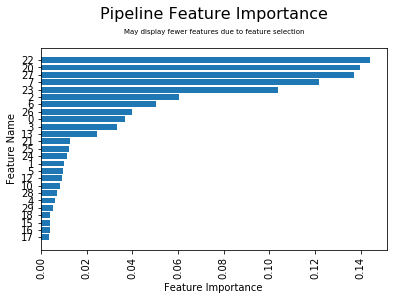

In [9]:
pipeline.plot_feature_importance()

# Getting Started
[What is EvalML](self)

[Install](install)

# Objective functions

[Overview](objectives/overview)

[Fraud Prediction](demos/fraud)

[Lead Scoring](demos/lead_scoring)

[Defining Custom Objectives](objectives/custom_objectives)

# Automated Machine Learning

[Setting up pipeline search](automl/pipeline_search)

[Exploring search results](automl/search_results)

[Avoiding Overfitting](automl/guardrails)

[Regression Example](automl/regression_example)

# Resources
[Changelog](changelog)

[Roadmap](roadmap)

[API Reference](api_reference)